In [305]:
import pandas as pd
from numpy import random
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
# Enable inline plotting
%matplotlib inline

# Exercice 1. (Regression analysis of the investment data)

## 1.1

In [8]:
Location = r'/Users/apple/Desktop/invest.txt'
df = pd.read_csv(Location, sep = ' ')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
year        15 non-null int64
gnp         15 non-null float64
invest      15 non-null float64
cpi         15 non-null float64
interest    15 non-null float64
dtypes: float64(4), int64(1)
memory usage: 680.0 bytes


In [10]:
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


## 1.2

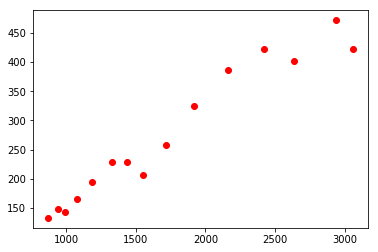

In [13]:
plt.plot(df['gnp'], df['invest'], 'ro')

## 1.3 

In [19]:
gnp = np.log(df['gnp'])
invest = np.log(df['invest'])

In [51]:
gnp

0     6.772394
1     6.850126
2     6.900429
3     6.982492
4     7.078257
5     7.190224
6     7.268362
7     7.345494
8     7.448916
9     7.559195
10    7.679667
11    7.790613
12    7.875917
13    7.985382
14    8.025353
Name: gnp, dtype: float64

In [209]:
n = 15
gnp_mean = np.mean(gnp)
invest_mean = np.mean(invest)
#b1
slope = sum((gnp-gnp_mean)*(invest-invest_mean))/sum((gnp-gnp_mean)**2)
#b0
intercept = invest_mean - slope*gnp_mean
sigma_carre = (1/(n-2))*sum((invest-(intercept+slope*gnp))**2)
intercept_variance = sigma_carre * ((1/n)+ (gnp_mean**2)/sum((gnp-gnp_mean)**2))
slope_variance = sigma_carre / sum((gnp-gnp_mean)**2)
intercept_standard_deviation = math.sqrt(intercept_variance)
slope_standard_deviation = math.sqrt(slope_variance)
determination_coefficient = 1-sum((invest-intercept-slope*gnp)**2)/sum((invest-invest_mean)**2)

In [41]:
intercept

-1.9635913352301833

In [42]:
slope

1.015281401598871

In [55]:
intercept_standard_deviation

0.4095472716623082

In [56]:
slope_standard_deviation

0.055383060354852805

In [210]:
determination_coefficient

0.9627572956057854

## 1.4

In [232]:
#test statistic
test = slope/math.sqrt(slope_variance) 

In [73]:
#test statistic
test

18.33198445686668

In [98]:
#p-value
pvalue = 2*(1- t.cdf(test, df = n-2)) # we reject H0 when p<<1 (H0: b1 = 0)

In [99]:
pvalue 

1.1363709973011282e-10

In [100]:
#p-value<<1, we reject H0

## 1.5

In [106]:
invest1_log = intercept + np.log(1000)*slope

In [108]:
#the necessary Investment for the GNP value 1000
invest1 = np.exp(invest1_log)
invest1

155.97942793105466

In [123]:
alpha = 1-0.9
quantile = t.ppf((1-alpha/2), df = n-2)
a = quantile * np.sqrt(sigma_carre) * np.sqrt((1/n) + ((np.log(1000)-gnp_mean)**2)/sum((gnp-gnp_mean)**2))
b = quantile * np.sqrt(sigma_carre) * np.sqrt(1 + (1/n) +  ((np.log(1000)-gnp_mean)**2)/sum((gnp-gnp_mean)**2))

In [124]:
CI1 = invest1_log+a
CI2 = invest1_log-a
print("confidence interval: [", np.exp(CI2)," , ",np.exp(CI1), "]")
PI1 = invest1_log+b
PI2 = invest1_log-b
print("prediction interval: [", np.exp(PI2)," , ",np.exp(PI1), "]")

confidence interval: [ 146.67552673421926  ,  165.87349286827552 ]
prediction interval: [ 132.00238933412913  ,  184.3116784508739 ]


## 1.6

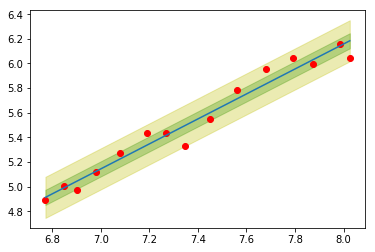

In [314]:
plt.plot(gnp, invest, 'ro')
def f(x):
    return intercept + x*slope
plt.plot(gnp, f(gnp))
plt.fill_between(gnp, f(gnp)-a, f(gnp)+a, color = "g", alpha = 0.3) #confidence intervals
plt.fill_between(gnp, f(gnp)-b, f(gnp)+b, color = "y", alpha = 0.3) #prediction intervals

## 1.7

In [298]:
reg = LinearRegression().fit(gnp.values.reshape(-1,1), invest)
intercept0 = reg.intercept_
slope0 = reg.coef_
determination_coefficient0 = reg.score(gnp.values.reshape(-1,1), invest)
invest0 = reg.predict(np.log(1000))

In [299]:
print("the intercept is: ", intercept0, "\n the slope is: ", slope0, "\n the determination_coefficient is: ", determination_coefficient0, 
      "\n the necessary In- vestment for the GNP value 1000 is: " , np.exp(invest0))

the intercept is:  -1.9635913352301815 
 the slope is:  [1.0152814] 
 the determination_coefficient is:  0.9627572956057855 
 the necessary In- vestment for the GNP value 1000 is:  [155.97942793]


we can see that those calculated ‘by hand’ (Steps 3 and 5) coincide with the ones obtained using existing implementation.

## 1.8 

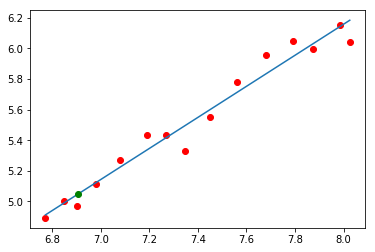

In [158]:
plt.plot(gnp, invest, 'ro')
def f(x):
    return intercept0 + x*slope0
plt.plot(gnp, f(gnp))
plt.plot(np.log(1000), invest0, 'go')

## 1.9

In [176]:
interest = df['interest']
array = np.vstack((gnp.values, interest.values))
X = np.vstack((np.array([1]*n), array)).T

In [177]:
X

array([[ 1.        ,  6.77239364,  5.16      ],
       [ 1.        ,  6.85012617,  5.87      ],
       [ 1.        ,  6.9004285 ,  5.95      ],
       [ 1.        ,  6.98249163,  4.88      ],
       [ 1.        ,  7.07825726,  4.5       ],
       [ 1.        ,  7.19022378,  6.44      ],
       [ 1.        ,  7.26836248,  7.83      ],
       [ 1.        ,  7.34549395,  6.25      ],
       [ 1.        ,  7.4489161 ,  5.5       ],
       [ 1.        ,  7.55919466,  5.46      ],
       [ 1.        ,  7.67966743,  7.46      ],
       [ 1.        ,  7.79061331, 10.28      ],
       [ 1.        ,  7.87591714, 11.77      ],
       [ 1.        ,  7.98538224, 13.42      ],
       [ 1.        ,  8.02535287, 11.02      ]])

In [178]:
gram_matrix = np.dot(X.T,X)/n

In [179]:
gram_matrix

array([[ 1.        ,  7.38352141,  7.45266667],
       [ 7.38352141, 54.68323179, 55.94590287],
       [ 7.45266667, 55.94590287, 62.92371333]])

In [180]:
np.linalg.matrix_rank(gram_matrix)

3

the rank of gram matrix is 3, which means that it is full rank 

## 1.10 

In [214]:
p = 2
regression_coefficients = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), invest)
sigma_carre1 = (1/(n-(p+1)))*sum((invest-(np.dot(X, regression_coefficients.T)))**2)
C = np.linalg.inv(np.dot(X.T,X))*sigma_carre1 
determination_coefficient1 = 1-sum((invest-(np.dot(X, regression_coefficients.T)))**2)/sum((invest-invest_mean)**2)
beta0 = regression_coefficients[0]
beta1 = regression_coefficients[1]
beta2 = regression_coefficients[2]

In [188]:
regression_coefficients

array([-2.18045473,  1.05124269, -0.00652888])

In [201]:
C

array([[ 4.38772697e-01, -6.72457405e-02,  7.82053357e-03],
       [-6.72457405e-02,  1.04165249e-02, -1.29683702e-03],
       [ 7.82053357e-03, -1.29683702e-03,  2.35444629e-04]])

In [212]:
determination_coefficient1

0.9633108306726244

In [213]:
print("the three regression co- efficients: \n beta0 = ",regression_coefficients[0], "\n beta1 = ", regression_coefficients[1],  "\n beta2 = ", regression_coefficients[2])
print("the standard deviations: \n for beta0: ", math.sqrt(C[0][0]), "\n for beta1: ", math.sqrt(C[1][1]), "\n for beta2: ", math.sqrt(C[2][2]))
print("the determination coefficient: \n ", determination_coefficient1)

the three regression co- efficients: 
 beta0 =  -2.1804547259122575 
 beta1 =  1.0512426913198811 
 beta2 =  -0.006528879406102708
the standard deviations: 
 for beta0:  0.6623991977963694 
 for beta1:  0.10206137806192317 
 for beta2:  0.015344205065604207
the determination coefficient: 
  0.9633108306726244


In [366]:
test_significant0 = beta0/math.sqrt(C[0][0]) 
test_significant1 = beta1/math.sqrt(C[1][1]) 
test_significant2 = beta2/math.sqrt(C[2][2]) 
pvalue0 = 2*min((1- t.cdf(test_significant0, df = n-(p+1))), t.cdf(test_significant0, df = n-(p+1)))
pvalue1 = 2*min((1- t.cdf(test_significant1, df = n-(p+1))), t.cdf(test_significant1, df = n-(p+1)))
pvalue2 = 2*min((1- t.cdf(test_significant2, df = n-(p+1))), t.cdf(test_significant2, df = n-(p+1)))

In [367]:
print("p-value of the first coefficient beta0: ", pvalue0)
print("p-value of the second coefficient beta1: ", pvalue1)
print("p-value of the third coefficient beta2: ", pvalue2)

p-value of the first coefficient beta0:  0.006438367050919603
p-value of the second coefficient beta1:  2.5995168484449493e-07
p-value of the third coefficient beta2:  0.6780071418822776


We can see that the second coefficient is the most important.
p-value is given by 2min(P(X<=x|H), P(X>=x|H))

## 1.11

In [243]:
investment_log = beta0 + beta1* np.log(1000) + beta2*10

In [356]:
investment_log

5.015983730483013

In [247]:
alpha1 = 1-0.999
quantile1 = t.ppf((1-alpha1/2), df = n-(p+1))

In [368]:
x = np.array([1, np.log(1000), 10])
a1 = quantile1*math.sqrt(sigma_carre1 * np.dot(np.dot(x , np.linalg.inv(np.dot(X.T,X))), x.T))
b1 = quantile1*math.sqrt(sigma_carre1 * (1 + np.dot(np.dot(x ,np.linalg.inv(np.dot(X.T,X))), x.T)))

In [370]:
CI3 = investment_log + a1
CI4 = investment_log - a1
PI3 = investment_log + b1
PI4 = investment_log - b1
print("confidence interval: [", CI4," , ", CI3, "]")
print("prediction interval: [", PI4," , ", PI3, "]")

confidence interval: [ 4.64018403668841  ,  5.391783424277616 ]
prediction interval: [ 4.473803343640594  ,  5.558164117325432 ]


## 1.12

In [385]:
X, Y = np.meshgrid(gnp, interest)
Z = beta0+beta1*X+beta2*Y

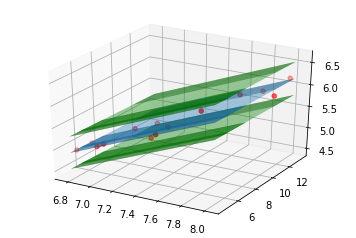

In [401]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(gnp, interest, invest, color = 'r')
from matplotlib import cm
ax.plot_surface(X,Y,Z,alpha = 0.4)
ax.plot_surface(X,Y,Z+a1,color = 'g',alpha = 0.4)
ax.plot_surface(X,Y,Z-a1,color = 'g', alpha = 0.4)
#ax.plot3D(gnp, interest, np.dot(X, regression_coefficients.T), 'r'
#ax.plot_surface(np.vstack((gnp.values,gnp.values)), np.stack((interest.values,interest.values)), np.stack((np.dot(X, regression_coefficients.T)-a1, np.dot(X, regression_coefficients.T)+a1))
              #,color = "g", alpha = 0.6)
#ax.plot_surface(np.vstack((gnp.values,gnp.values)), np.stack((interest.values,interest.values)), np.stack((np.dot(X, regression_coefficients.T)-b1, np.dot(X, regression_coefficients.T)+b1))
             # ,color = "y", alpha = 0.4)

## 1.13 

In [301]:
reg1 = LinearRegression().fit(array.T, invest)
beta0_1 = reg1.intercept_
beta1_1 = reg1.coef_[0]
beta2_1 = reg1.coef_[1]
determination_coefficient2 = reg1.score(array.T, invest)
invest2 = reg1.predict(np.array([[np.log(1000),10]]))

In [290]:
reg.coef_ #=[beta1,beta2]

array([ 1.05124269, -0.00652888])

In [291]:
reg.intercept_ #=beta0

-2.1804547259114004

In [292]:
reg.score(array.T, invest) #=determination_coefficient1

0.9633108306726245

In [297]:
reg.predict(np.array([[np.log(1000),10]])) #=investment_log

array([5.01598373])

In [302]:
print("beta0 is: ", beta0_1, "\n beta1 is: ", beta1_1,"\n beta2 is: ",beta2_1, "\n the determination_coefficient is: ", determination_coefficient2, 
      "\n the necessary In- vestment for the GNP value 1000 and Interest value 10 is: " , invest2)

beta0 is:  -2.1804547259114004 
 beta1 is:  1.0512426913196595 
 beta2 is:  -0.006528879406068252 
 the determination_coefficient is:  0.9633108306726245 
 the necessary In- vestment for the GNP value 1000 and Interest value 10 is:  [5.01598373]


we can see that those calculated ‘by hand’ (Steps 10 and 11) coincide with the ones obtained using existing implementation.